In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
Zillow=pd.read_csv('Zillow_3Bedroom.csv')

In [56]:
Cinci=Zillow[Zillow['City']=='Cincinnati'].reset_index()

In [57]:
Cinci.drop('index',axis=1,inplace=True)

In [58]:
Cinci

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
0,45238,Cincinnati,OH,Cincinnati,Hamilton,522,83.137629,80.524894,76.513255,71.289954,...,76.247689,75.471698,67.940741,77.615235,80.254351,81.042866,82.870370,84.311940,83.479981,82.770109
1,45211,Cincinnati,OH,Cincinnati,Hamilton,985,NaN,NaN,NaN,NaN,...,64.921894,66.459276,70.269347,70.269347,71.123755,67.852523,67.564647,67.960915,68.541232,66.075800
2,45230,Cincinnati,OH,Cincinnati,Hamilton,2227,100.100984,103.763790,98.853267,98.978289,...,98.674519,98.923841,101.053085,102.964691,103.551802,106.439710,106.855346,106.951872,107.685485,103.689567
3,45208,Cincinnati,OH,Cincinnati,Hamilton,3302,169.543773,175.819930,160.014450,170.882117,...,204.139744,210.137476,216.814941,221.458999,225.556229,229.198842,224.221663,222.331571,224.272335,223.404255


In [59]:
Cinci.drop(['City','State','Metro','CountyName','SizeRank'],axis=1,inplace=True)

In [60]:
Cinci.columns

Index(['RegionName', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05',
       '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11',
       '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05',
       '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11',
       '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05',
       '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11',
       '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05',
       '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11',
       '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05',
       '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11',
       '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05',
       '2016-06', '2016-07', '2016-08', '2016-09

In [61]:
pd.pivot_table(Cinci,values=Cinci.iloc[:,6:],index=Cinci.columns[6:],columns=Cinci['RegionName')

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-61-a3e27c730949>, line 1)

In [62]:
Cinci=Cinci.set_index(['RegionName']).stack().reset_index(name='Value').rename(columns={'level_1':'Date'})

In [64]:
Cinci['Date']=pd.to_datetime(Cinci['Date'])

In [66]:
Cinci.set_index(['Date'],inplace=True)

In [67]:
Cinci_45208=Cinci[Cinci['RegionName']==45208]

In [68]:
Cinci_45208.drop('RegionName',axis=1,inplace=True)

C:\Users\15132\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


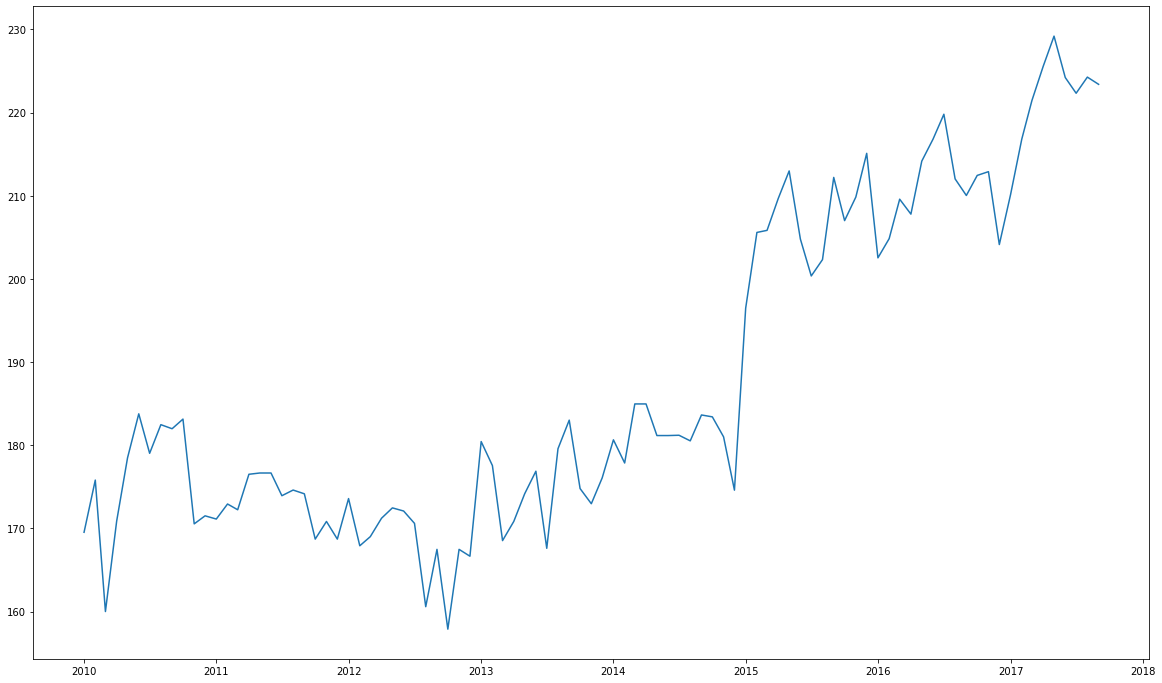

In [69]:
plt.figure(figsize=(20,12))
plt.plot(Cinci_45208)

<Figure size 1440x864 with 0 Axes>

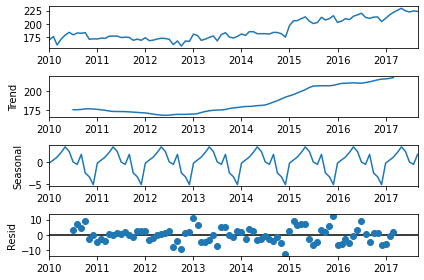

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(Cinci_45208)
plt.figure(figsize=(20,12))
result.plot()
plt.show()

In [81]:
#ADF-test
from statsmodels.tsa.stattools import adfuller

In [85]:
adf = adfuller(Cinci_45208, autolag='AIC')
print(f'ADF Statistic: {adf[0]}')
print(f'p_value: {adf[1]}')
print(f'n-lags: {adf[2]}')
for key, value in adf[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: 1.0011229160477486
p_value: 0.9942777824971595
n-lags: 6
Critial Values:
   1%, -3.5087828609430614
Critial Values:
   5%, -2.895783561573195
Critial Values:
   10%, -2.5850381719848565


In [141]:
Cinci_45208_detrend =  (Cinci_45208 - Cinci_45208.rolling(window=12).mean())/Cinci_45208.rolling(window=12).std()

In [160]:
Cinci_45208_36lag =  Cinci_45208 - Cinci_45208.shift(36)

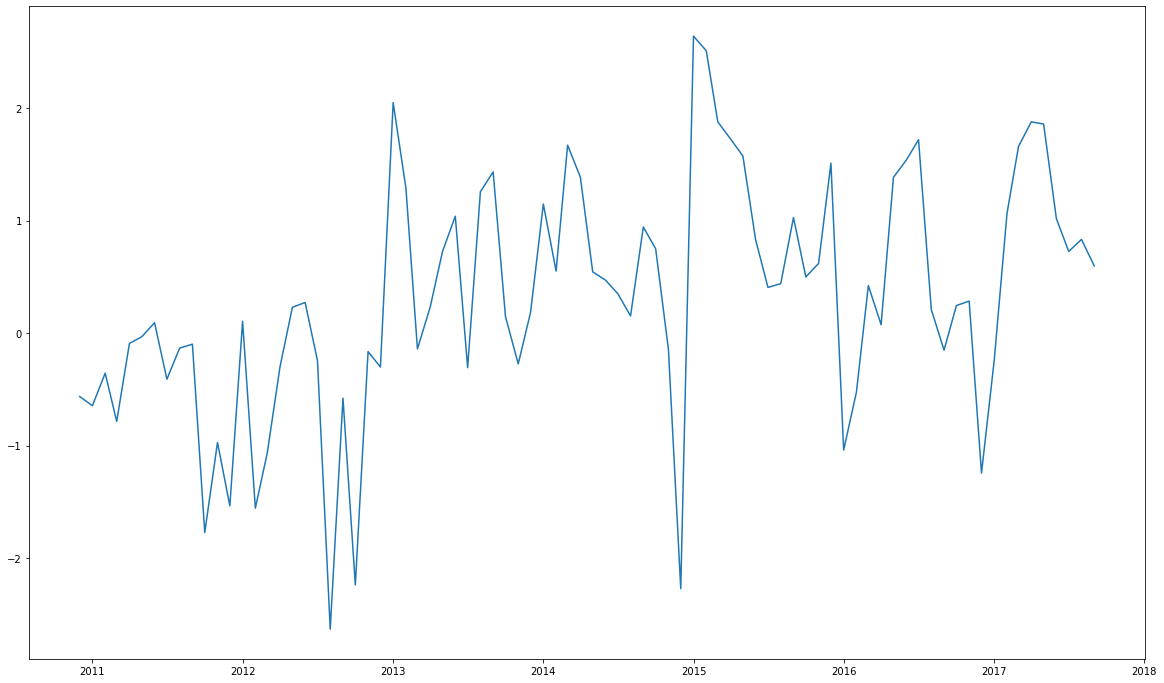

In [142]:
plt.figure(figsize=(20,12))
plt.plot(Cinci_45208_detrend)

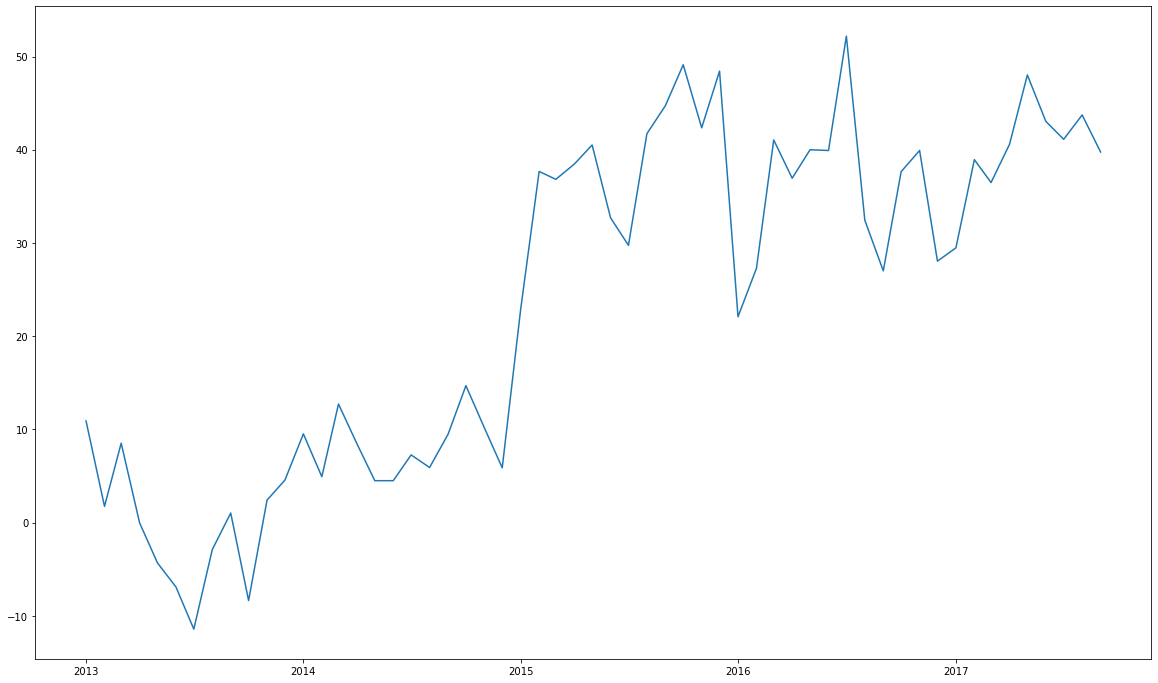

In [161]:
plt.figure(figsize=(20,12))
plt.plot(Cinci_45208_36lag)

In [144]:
adf = adfuller(Cinci_45208_detrend.dropna(), autolag='AIC')
print(f'ADF Statistic: {adf[0]}')
print(f'p_value: {adf[1]}')
print(f'n-lags: {adf[2]}')
for key, value in adf[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -5.381552016808403
p_value: 3.7028805282521967e-06
n-lags: 0
Critial Values:
   1%, -3.5137900174243235
Critial Values:
   5%, -2.8979433868293945
Critial Values:
   10%, -2.5861907285474777


In [162]:
adf = adfuller(Cinci_45208_36lag.dropna(), autolag='AIC')
print(f'ADF Statistic: {adf[0]}')
print(f'p_value: {adf[1]}')
print(f'n-lags: {adf[2]}')
for key, value in adf[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -1.5801499508300623
p_value: 0.49355669998786494
n-lags: 7
Critial Values:
   1%, -3.5714715250448363
Critial Values:
   5%, -2.922629480573571
Critial Values:
   10%, -2.5993358475635153


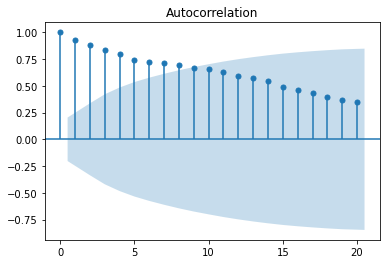

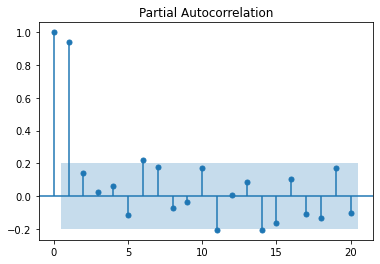

In [128]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(Cinci_45208)
plot_pacf(Cinci_45208)
plt.show()

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
training=Cinci_45208[0:65]
testing=Cinci_45208[65:]

In [153]:
def gridSearch(itemObj):
    # Define the p, d and q parameters to take any value between 0 and 3
    p = d = q = range(0, 3)

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    bestAIC = np.inf
    bestParam = None
    bestSParam = None
    
    print('Running GridSearch')
    
    #use gridsearch to look for optimial arima parameters
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(itemObj,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic<bestAIC:
                    bestAIC = results.aic
                    bestParam = param
                    bestSParam = param_seasonal

            except:
                continue
                
    print('the best one is:',bestAIC,bestParam,bestSParam)

In [154]:
gridSearch(training)

Running GridSearch
the best ones are: 79.41548260158018 (2, 2, 2) (1, 2, 2, 12)


In [155]:
import statsmodels.api as sm

In [252]:
fin=sm.tsa.statespace.SARIMAX(Cinci_45208,order=(2,2,2),seasonal_order=(1,2,2,12))

In [253]:
final = fin.fit()
print(final.summary().tables[0])
print(final.summary().tables[1])
print(final.summary().tables[2])

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                   93
Model:             SARIMAX(2, 2, 2)x(1, 2, 2, 12)   Log Likelihood                -247.582
Date:                            Tue, 04 May 2021   AIC                            511.164
Time:                                    07:08:16   BIC                            528.801
Sample:                                01-01-2010   HQIC                           518.143
                                     - 09-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1586      0.208     -5.571      0.000      -1.566      -0.751
ar.L2         -0.1689      0.175   

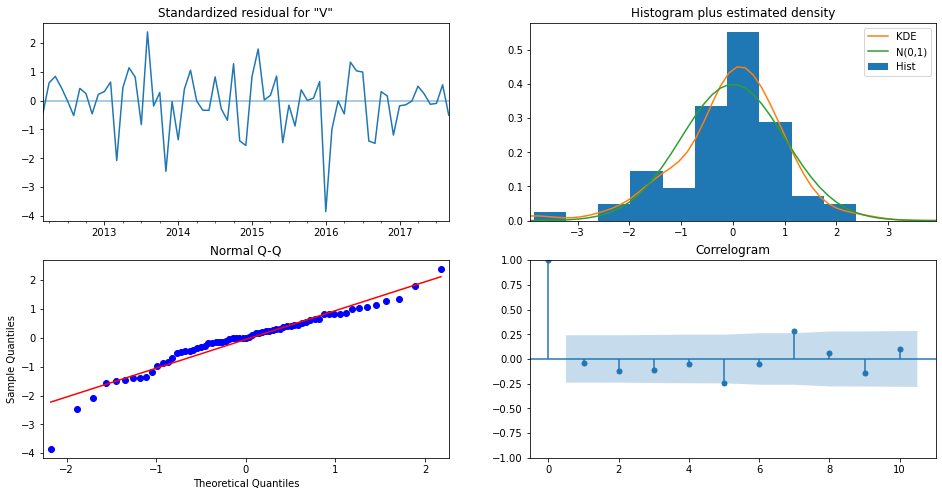

In [254]:
final.plot_diagnostics(figsize=(16, 8))
plt.show()

In [255]:
pred = final.get_prediction(start=pd.to_datetime('2015-05-01'), end=pd.to_datetime('2017-09-01'))
pred_ci = pred.conf_int()
y_forecasted['Value'] = pred.predicted_mean
y_forecasted=pd.DataFrame(y_forecasted)
#y_forecasted.drop('predicted_mean',axis=1,inplace=True)
mse = ((y_forecasted - testing) ** 2).mean()
print('The Root Mean Squared Error of SARIMA with season_length={} is {}'.format(12,round(np.sqrt(mse), 2)))

The Root Mean Squared Error of SARIMA with season_length=12 is Value    8.39
dtype: float64


<Figure size 1440x864 with 0 Axes>

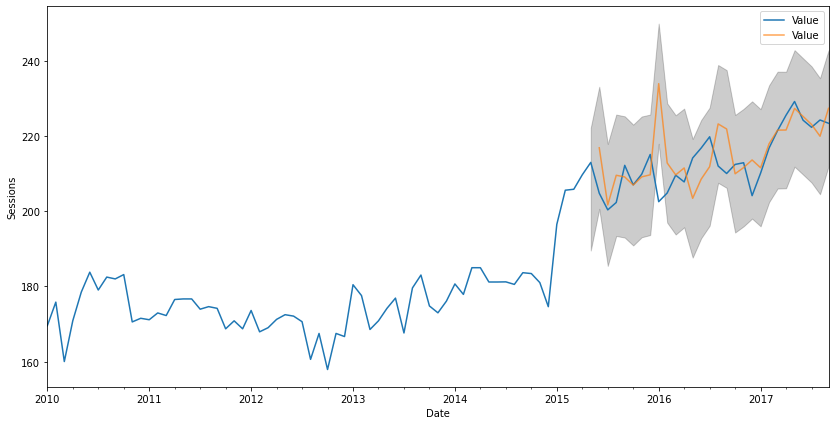

In [256]:
plt.figure(figsize=(20,12))
ax = Cinci_45208.plot(label='observed')
y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sessions')
plt.legend()
plt.show()

In [257]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    #ax.set_ylabel(y.price)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

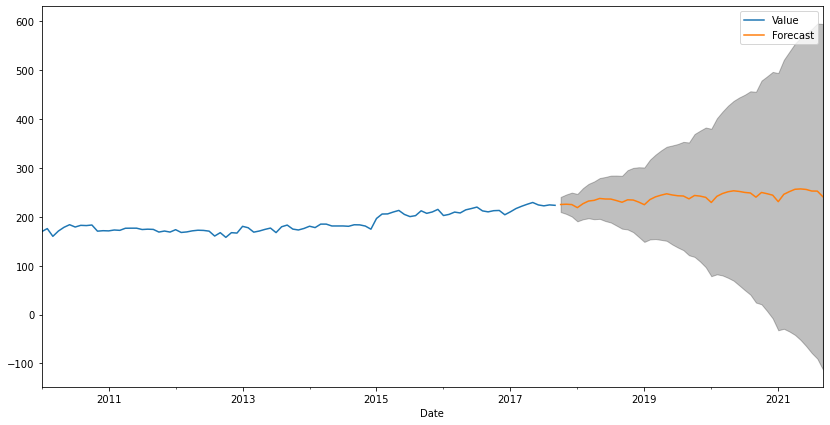

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2017-10-01,225.092186,209.679212,240.505160
1,2017-11-01,225.682835,205.839972,245.525699
2,2017-12-01,224.959696,200.498076,249.421317
3,2018-01-01,218.686569,190.656456,246.716682
4,2018-02-01,226.709122,194.818919,258.599325
5,2018-03-01,232.144456,197.011066,267.277846
6,2018-04-01,233.597039,194.946222,272.247857
7,2018-05-01,237.442208,195.741249,279.143167
8,2018-06-01,236.343760,191.324137,281.363382
9,2018-07-01,236.202177,188.248299,284.156055


In [263]:
forecast(final,48,Cinci_45208)